In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import sys

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels


In [5]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list
      

In [6]:

def plot_pretty_blue_confusion_matrix(classes, y_true=[], y_pred=[], cm=[],
                                      normalize=False,
                                      title=None,
                                      cmap=plt.cm.Blues,
                                      savepath=None,
                                      figsize=(24,24)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'
    labels=list(range(0,len(classes),1))
    # Compute confusion matrix
    if (len(y_true)==0 and len(y_pred)==0) and len(cm)==0:
        sys.exit('need at least cm or the predictions and truths')
    elif len(cm)==0:
        cm = confusion_matrix(y_true, y_pred,labels=labels)
    #     precisions = np.diag(cm) / np.sum(cm, axis = 0)
    #     recalls = np.diag(cm) / np.sum(cm, axis = 1)
    #     print("Precision: ", np.round(precisions, 4))
    #     print("Recall: ", np.round(recalls, 4))

        # Only use the labels that appear in the data
    #     classes = classes[unique_labels(y_true, y_pred)]
        
#     print(cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        acc = 0
        for i in range(len(classes)):
            acc += cm[i][i]
        acc = acc/len(classes)
        print('Avg Acc',acc)
    else:
        print("Confusion matrix")

#     print(cm.shape)
#     print(len(classes))
    save_df = pd.DataFrame(data=cm, columns=classes)
    save_df.index = classes
    save_df.to_csv(savepath+'.csv', index=True)

    fig, ax = plt.subplots(figsize=figsize)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # ax.tick_params(direction='out', length=6, width=2, colors='r',
    #            grid_color='r', grid_alpha=0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.25)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = cm[i, j]
            if math.isnan(val):
                val = 0.0
            ax.text(j, i, format(val, fmt),
                    ha="center", va="center", size=12,
                    color="white" if cm[i, j] > thresh else "black")
    if savepath is not None:
        fig.savefig(savepath + '.jpg',dpi=150)
    return ax

In [7]:
df_dict = {}
species_list = []
FOLDS=[1,2,3,4,5]
SEEDS=[0,1,2,3,4]
precision = np.zeros(25)
recall = np.zeros(25)
f1 = np.zeros(25)
fs = 0
for f in FOLDS:
    for s in SEEDS:
        fname = 'cascaded-75/confusion_fold{}seed{}.csv'.format(f,s)
        df_dict[fname]= pd.read_csv(fname,index_col=0)
        tmp_cm = df_dict[fname].to_numpy()
        if f == 2: 
            tmp_cm = np.delete(tmp_cm,10,axis=0)# An. quadrimaculatis has no samples for known for fold 2
            tmp_cm = np.delete(tmp_cm,10,axis=1)# An. quadrimaculatis has no samples for known for fold 2
                                
        ps = np.diag(tmp_cm) / np.sum(tmp_cm, axis = 0)
        rs = np.diag(tmp_cm) / np.sum(tmp_cm, axis = 1)
        for i in range(len(ps)):
            if math.isnan(ps[i]):
                ps[i]=0
#         print(rs)
        precision[fs]=np.average(ps)
        recall[fs]=np.average(rs)
        f1[fs] = 2*recall[fs]*precision[fs]/(recall[fs]+precision[fs])
    #     if 'average' not in df_dict:
    #         df_dict['average'] = df_dict[fname].copy()
        fs+=1
    for species in df_dict[fname].columns:
        if species.capitalize() not in species_list:
            species_list.append(species.capitalize())
#             idx = new_species_list.index(species)
#             df_dict['average'].insert(idx, species, df_dict[species][], True) 
# print(precision)
print(f1)
f1_avg=np.average(f1)
f1_std=np.std(f1)

print('Macro F1 score: {} +- {} over 25 folds'.format(f1_avg,f1_std))
species_list=sorted(species_list)
species_list

[0.82681331 0.82559509 0.79431421 0.79262768 0.80658236 0.75186183
 0.74762787 0.75741514 0.80350335 0.82027507 0.80084343 0.81033211
 0.85490078 0.82653818 0.82776472 0.82558265 0.82339509 0.81415456
 0.82028787 0.85864479 0.76370864 0.77189764 0.74574061 0.75067816
 0.71395591]
Macro F1 score: 0.797401642987324 +- 0.03653437880293873 over 25 folds


<ipython-input-7-1732dbf40184>:18: RuntimeWarning: invalid value encountered in true_divide
  ps = np.diag(tmp_cm) / np.sum(tmp_cm, axis = 0)


['Aedes aegypti',
 'Aedes albopictus',
 'Aedes dorsalis',
 'Aedes japonicus',
 'Aedes sollicitans',
 'Aedes taeniorhynchus',
 'Aedes vexans',
 'Anopheles coustani',
 'Anopheles crucians',
 'Anopheles freeborni',
 'Anopheles funestus',
 'Anopheles gambiae',
 'Anopheles punctipennis',
 'Anopheles quadrimaculatus',
 'Culex erraticus',
 'Culex pipiens',
 'Culex salinarius',
 'Psorophora columbiae',
 'Psorophora cyanescens',
 'Psorophora ferox',
 'Unknown']

In [8]:

cm_avg = np.zeros((len(species_list),len(species_list)))
cm_all = np.zeros((len(species_list),len(species_list),25))
cm_iters =  np.zeros((len(species_list),len(species_list)),dtype=np.int)
fs=0
for f in FOLDS:
    for s in SEEDS:
        fname = 'cascaded-75/confusion_fold{}seed{}.csv'.format(f,s)
    #     print(df_dict[fname].index)
        for truth in df_dict[fname].index:
            for pred in df_dict[fname].columns:
                tidx = species_list.index(truth.capitalize())
                pidx = species_list.index(pred.capitalize())
#                 if tidx ==18 and pidx == 18:
#                     print(df_dict[fname].loc[truth,pred])
                if math.isnan(df_dict[fname].loc[truth,pred]):
                    continue
                cm_avg[tidx,pidx]+=df_dict[fname].loc[truth,pred]
                cm_all[tidx,pidx,fs]+=df_dict[fname].loc[truth,pred]
                cm_iters[tidx,pidx]+=1
#         print(cm_all[:,:,fs])
        fs+=1

cm_avg=np.divide(cm_avg,cm_iters)

precision = np.zeros(25)
recall = np.zeros(25)
f1 = np.zeros(25)
for fs in range(25):
    ps = np.diag(cm_all[:,:,fs]) / np.sum(cm_all[:,:,fs], axis = 0)
    rs = np.diag(cm_all[:,:,fs]) / np.sum(cm_all[:,:,fs], axis = 1)
    print(ps)
    precision[fs]=np.average(ps)
    recall[fs]=np.average(rs)
    f1[fs] = 2*recall[fs]*precision[fs]/(recall[fs]+precision[fs])
print(precision)
f1_avg=np.average(f1)
f1_std=np.std(f1)
    
cm_std =  np.zeros((len(species_list),len(species_list)))
for f in FOLDS:
    for s in SEEDS:
        fname = 'cascaded-75/confusion_fold{}seed{}.csv'.format(f,s)
    #     print(df_dict[fname].index)
        for truth in df_dict[fname].index:
            for pred in df_dict[fname].columns:
                tidx = species_list.index(truth.capitalize())
                pidx = species_list.index(pred.capitalize())
                if math.isnan(df_dict[fname].loc[truth,pred]):
                    continue
    #             print(cm_avg[tidx,pidx]-df_dict[fname].loc[truth,pred])
                cm_std[tidx,pidx]+=(cm_avg[tidx,pidx]-df_dict[fname].loc[truth,pred])**2
cm_std=np.divide(cm_std,np.subtract(cm_iters,1))
# cm_std
save_df = pd.DataFrame(data=cm_std, columns=species_list)
save_df.index = species_list
save_df.to_csv('cascaded-75/stdev_confusion'+'.csv', index=True)
acc = 0
for i in range(len(species_list)):
    acc += cm_avg[i][i]
acc = acc/len(species_list)
print('Macro F1 score: {} +- {} over 25 folds'.format(f1_avg,f1_std))

[0.99153055 0.99904215 1.         0.97582912 0.99428027        nan
 0.99656029 1.         0.8976762  1.         0.87099846 0.99096892
        nan        nan 0.99868342 1.         0.94557823 1.
        nan 0.         0.22532157]
[0.99195039 0.96492806 1.         0.97432836 0.99259944        nan
 1.         1.         0.9972119  0.99032494 0.87578762 0.99093546
        nan        nan 0.99287499 0.99874388 0.94557823 0.99899735
        nan        nan 0.21014602]
[0.99647733 0.96779964 1.         0.97309978 0.99084249        nan
 0.99684127        nan 0.99357208 0.98990674 0.89231174 0.9912916
        nan        nan 0.99494253 0.99391978 0.9447526  0.9950481
        nan 0.         0.20206331]
[0.99875193 0.95212766 1.         0.97468193 0.9862259         nan
 0.99681782        nan 0.99628942 0.98871533 0.88937405 1.
        nan        nan 0.99288158 0.99884577 0.94557823 0.99302987
        nan 0.         0.19819433]
[0.99857371 1.         1.         1.         0.99448529        nan
 0.9977

<ipython-input-8-b18255ff0ae1>:29: RuntimeWarning: invalid value encountered in true_divide
  ps = np.diag(cm_all[:,:,fs]) / np.sum(cm_all[:,:,fs], axis = 0)
<ipython-input-8-b18255ff0ae1>:30: RuntimeWarning: invalid value encountered in true_divide
  rs = np.diag(cm_all[:,:,fs]) / np.sum(cm_all[:,:,fs], axis = 1)


In [9]:
species_list=['Ae. aegypti',
 'Ae. albopictus',
 'Ae. dorsalis',
 'Ae. japonicus',
 'Ae. sollicitans',
 'Ae. taeniorhynchus',
 'Ae. vexans',
 'An. coustani',
 'An. crucians sl',
 'An. freeborni',
 'An. funestus sl',
 'An. gambiae sl',
 'An. punctipennis',
 'An. quadrimaculatus',
 'Cx. erraticus',
 'Cx. pipiens sl',
 'Cx. salinarius',
 'Ps. columbiae',
 'Ps. cyanescens',
 'Ps. ferox',
 'Unknown']


Normalized confusion matrix
Avg Acc 0.7496793290704724


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

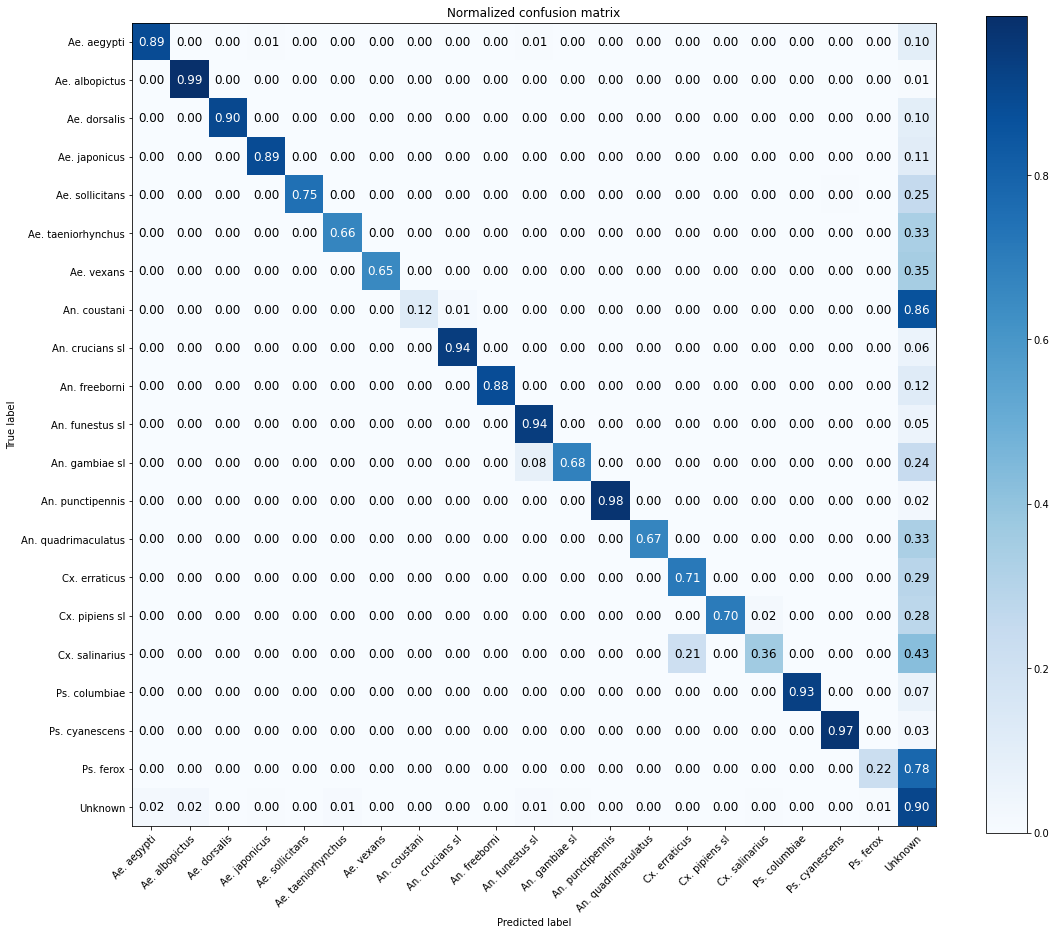

In [10]:
plot_pretty_blue_confusion_matrix(classes=species_list,
                                  cm=cm_avg, 
                                  normalize=True,  
                                  savepath='cascaded-75/avg_confusion',
                                  figsize=(18,18))

Normalized confusion matrix
Avg Acc 0.9683826179056414


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

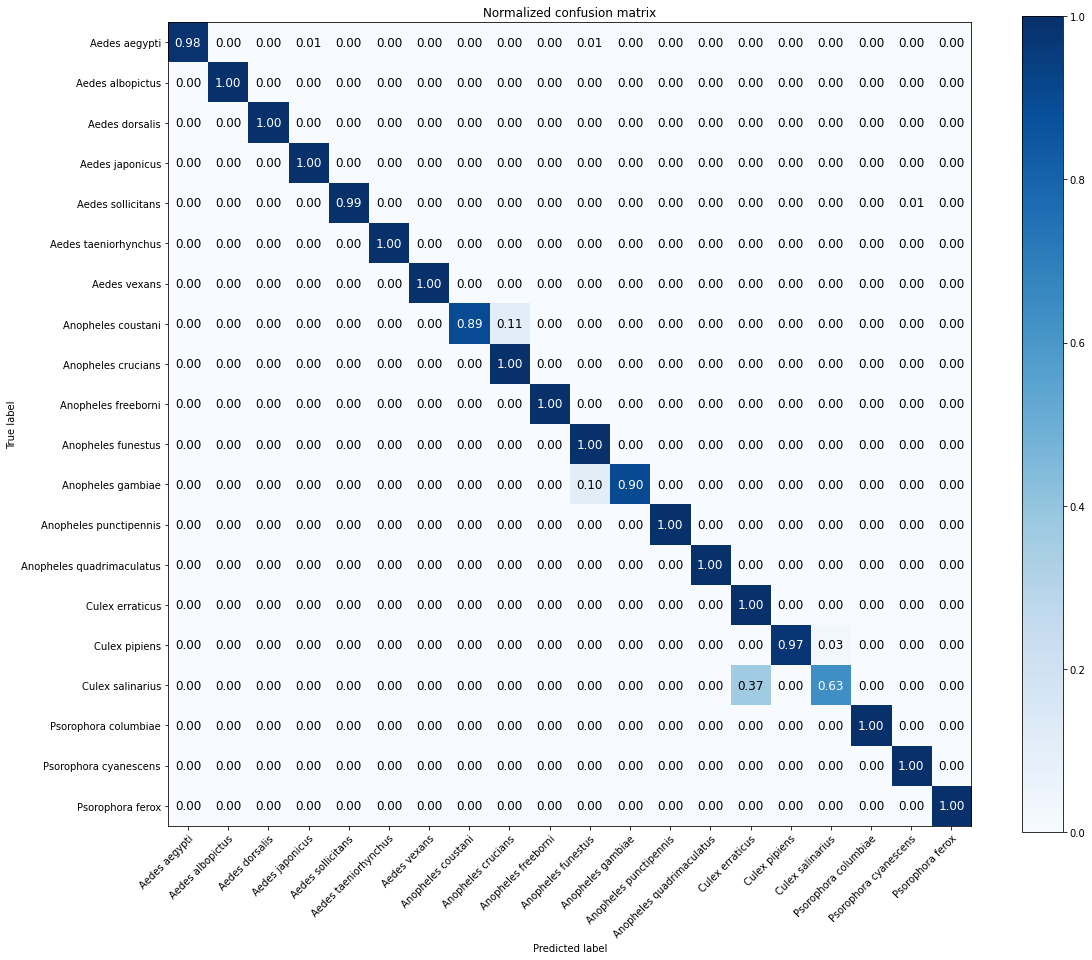

In [17]:
plot_pretty_blue_confusion_matrix(classes=species_list[:20],
                                  cm=cm_avg[:20,:20], 
                                  normalize=True,  
                                  savepath='cascaded/avg_confusion_just_pred_known',
                                  figsize=(18,18))


In [18]:
df_dict = {}
species_list = []
FOLDS=[1,2,3,4,5]
SEEDS=[0,1,2,3,4]
for f in FOLDS:
    for s in SEEDS:
        fname = 'cascaded/confusion_fold{}seed{}_known.csv'.format(f,s)
        df_dict[fname]= pd.read_csv(fname,index_col=0)
    #     if 'average' not in df_dict:
    #         df_dict['average'] = df_dict[fname].copy() 
    for species in df_dict[fname].columns:
        if species.capitalize() not in species_list:
            species_list.append(species.capitalize())
#             idx = new_species_list.index(species)
#             df_dict['average'].insert(idx, species, df_dict[species][], True) 
species_list=sorted(species_list)
species_list

cm_avg = np.zeros((len(species_list),len(species_list)))
cm_iters =  np.zeros((len(species_list),len(species_list)),dtype=np.int)
for f in FOLDS:
    for s in SEEDS:
        fname = 'cascaded/confusion_fold{}seed{}_known.csv'.format(f,s)
    #     print(df_dict[fname].index)
        for truth in df_dict[fname].index:
            for pred in df_dict[fname].columns:
                tidx = species_list.index(truth.capitalize())
                pidx = species_list.index(pred.capitalize())
#                 if tidx ==18 and pidx == 18:
#                     print(df_dict[fname].loc[truth,pred])
                if math.isnan(df_dict[fname].loc[truth,pred]):
                    continue
                cm_avg[tidx,pidx]+=df_dict[fname].loc[truth,pred]
                cm_iters[tidx,pidx]+=1

cm_avg=np.divide(cm_avg,cm_iters)

cm_std =  np.zeros((len(species_list),len(species_list)))
for f in FOLDS:
    for s in SEEDS:
        fname = 'cascaded/confusion_fold{}seed{}_known.csv'.format(f,s)
    #     print(df_dict[fname].index)
        for truth in df_dict[fname].index:
            for pred in df_dict[fname].columns:
                tidx = species_list.index(truth.capitalize())
                pidx = species_list.index(pred.capitalize())
                if math.isnan(df_dict[fname].loc[truth,pred]):
                    continue
    #             print(cm_avg[tidx,pidx]-df_dict[fname].loc[truth,pred])
                cm_std[tidx,pidx]+=(cm_avg[tidx,pidx]-df_dict[fname].loc[truth,pred])**2
cm_std=np.divide(cm_std,np.subtract(cm_iters,1))
# cm_std
save_df = pd.DataFrame(data=cm_std, columns=species_list)
save_df.index = species_list
save_df.to_csv('cascaded/stdev_confusion_known'+'.csv', index=True)
acc = 0
for i in range(len(species_list)):
    acc += cm_avg[i][i]
acc = acc/len(species_list)
acc

0.9261517070087929

Normalized confusion matrix
Avg Acc 0.9235998592879398


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

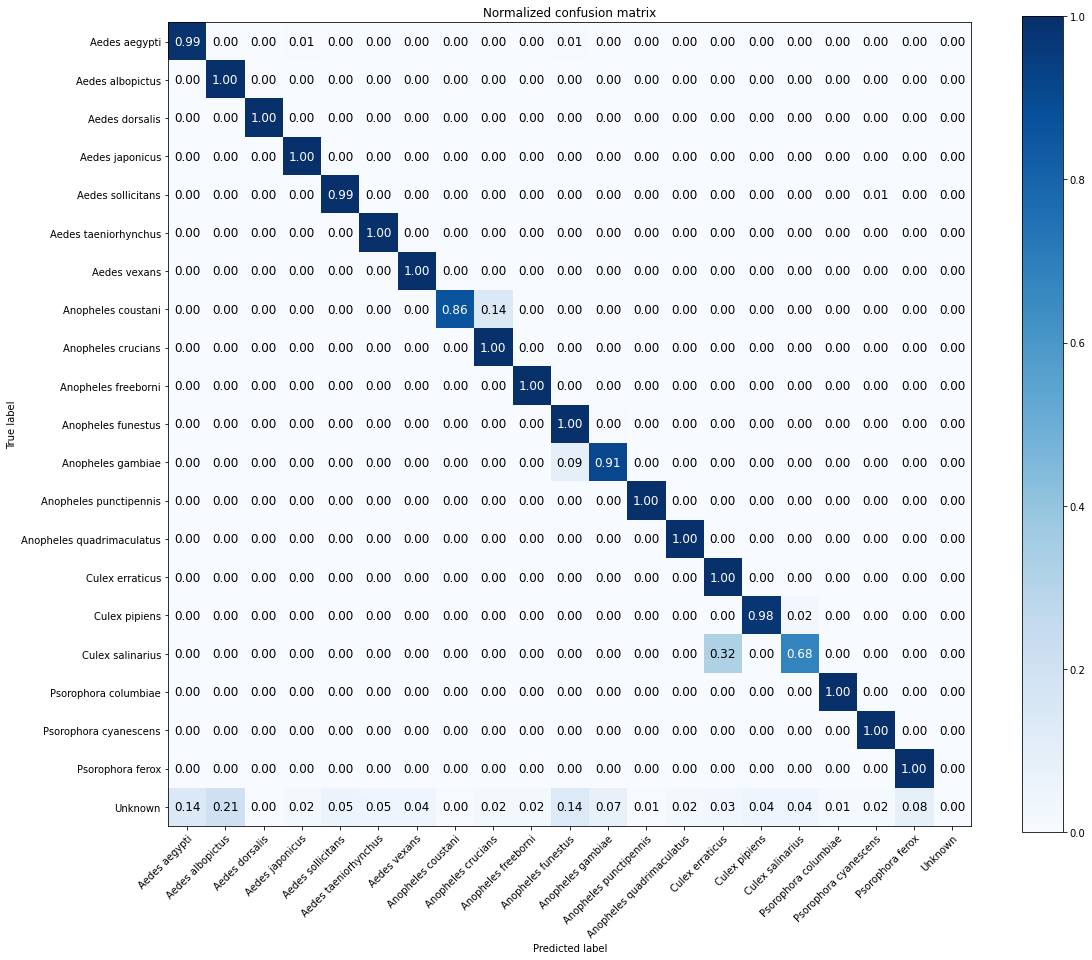

In [19]:
plot_pretty_blue_confusion_matrix(classes=species_list,
                                  cm=cm_avg, 
                                  normalize=True,  
                                  savepath='cascaded/avg_confusion_known',
                                  figsize=(18,18))